<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up </B> for Health - Deep Learning + No Shows</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote </B>and<b> 🍏 ShowUp </b>helper class</B></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
<ol>
<li><B>Problem statement</B>: A clear description of the problem the project aims to solve.</li><BR>
<li><B>Data source</B>: Information on where the data used in the project is obtained from.</li><BR>
<li><B>Libraries used</B>: A list of the Python libraries used in the project and a brief explanation of their role. Include library version.</li><BR>
<li><B>Exploratory Data Analysis (EDA)</B>: A summary of the initial findings from exploring the data.</li><BR>
<li><B>Preprocessing</B>: Steps taken to clean and prepare the data for model building.</li><BR>
<li><B>Model building</B>: An overview of the model used and the reasoning behind its selection.</li><BR>
 Precision = $\frac{\text{true positives}}{\text{true positives + false positives}}$, Recall = $\frac{\text{true positives}}{\text{true positives + false negatives}}$, F1 = $2 \times \frac{\text{precision} \times \text{recall}}{\text{precision + recall}}$</li><BR><BR>
<li><B>Model evaluation</B>: Evaluation metrics used to assess the performance of the model and results of the evaluation.</li><BR>
<li><B>Conclusion</B>: A summary of the findings and recommendations for further work.</li>
</ol>
</div>

#  🍏 Loading Helper Class

wandb_api_key: 651204c459ad2877b0d32ae2f37ce28d159a9cbe

In [1]:
import wandb
wandb.login()

wandb: Currently logged in as: drjanduplessis (bromptonhealthpcn). Use `wandb login --relogin` to force relogin


True

In [2]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

# 📙 Loading Libraries

In [3]:
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from showupforhealth.params import *
from showupforhealth.utils import *


# 💾 Build Surgery Datasets
Merge **Appointment Data** with **Surgery Disease Register**, Weather and IMD2023

In [4]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head()

,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,17.7,0.0,40,0,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,54.0,1,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,19.4,0.0,66,2,0.03,1,0,0,0,1,0,0,8243.0,0.332691,0.600495,37.0,0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,18.3,0.0,58,0,0.11,0,1,0,0,0,0,0,7626.0,0.155802,0.215224,27.0,0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Define X and y

In [5]:
# Define X and y
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (901516, 36)
y - dependant variable - Appointment_status: (901516,)


# ✂️ Split data

In [61]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, val_size=0.3, test_size=0.2)

✅ OUTPUT: X_train, X_val, X_test, y_train, y_val, y_test
Train Set:  X_train, y_train - (450757, 36), (450757,)
  Val Set:  X_val, y_val - - - (270455, 36), (270455,)
 Test Set:  X_test, y_test - - (180304, 36), (180304,)


# ⚖️ Class imbalance
Including **distribution of imbalance** within train, val and test sets.

In [62]:
# How many "fraud" samples do I have in each split?
print("DNA distribution in train val and test set pre-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train).value_counts()[0]} DNAs in the train set")
print(f"There are {pd.Series(y_val).value_counts()[0]} DNAs in the val set")
print(f"There are {pd.Series(y_test).value_counts()[0]} DNAs in the test set")

DNA distribution in train val and test set pre-oversampling
---------------------------------------------------------------------------
There are 16970 DNAs in the train set
There are 10437 DNAs in the val set
There are 6977 DNAs in the test set


# 🔁 Oversampling SMOTE

In [63]:
# Oversampling with SMOTE
X_train_os, y_train_os = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

✅ Data Oversampled: SMOTE - X_train_os:(477165, 36) y_train_os :(477165,)


In [64]:
# How many "fraud" samples do I have in each split?
print("DNAs in X_train_o post-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train_o).value_counts()[0]} DNAs in the train set")

DNAs in X_train_o post-oversampling
---------------------------------------------------------------------------
There are 60702 DNAs in the train set


In [65]:
#Scale data
# Fit the scaler on the training data
scaler = fit_scaler(X_train_os, scaler_type='minmax')

In [66]:
# Use the fitted scaler to transform both training and test datasets
X_train_scaled = transform_data(X_train_os, scaler)
X_val_scaled = transform_data(X_val, scaler)
X_test_scaled = transform_data(X_test, scaler)

# 🧠 Neural Network iterations

In [85]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred): # defining a custom F1 score metric
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

metrics = [
    keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
    f1_score,  # adding the custom F1 score metric
#     keras.metrics.TruePositives(name='tp'),
#     keras.metrics.FalsePositives(name='fp'),
#     keras.metrics.TrueNegatives(name='tn'),
#     keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [86]:
def plot_loss_precision_recall_curve(history):

    fig, ax = plt.subplots(3, 2, figsize=(20, 15))

    # --- LOSS 
    ax[0, 0].plot(history.history['loss'], color="#a10606")
    ax[0, 0].plot(history.history['val_loss'], color="#1b5743")
    ax[0, 0].set_title('Model loss', fontsize = 18)
    ax[0, 0].set_ylabel('Loss', fontsize = 14)
    ax[0, 0].legend(['Train', 'Val'], loc='upper right')
    ax[0, 0].grid(axis="x", linewidth=0.5)
    ax[0, 0].grid(axis="y", linewidth=0.5)

    # --- RECALL
    ax[0, 1].plot(history.history['recall']) 
    ax[0, 1].plot(history.history['val_recall'])
    ax[0, 1].set_title('Model recall', fontsize = 18)
    ax[0, 1].set_ylabel('Recall', fontsize = 14) 
    ax[0, 1].legend(['Train', 'Val'], loc='lower right')
    ax[0, 1].grid(axis="x", linewidth=0.5)
    ax[0, 1].grid(axis="y", linewidth=0.5)

    # --- PRECISION
    ax[1, 0].plot(history.history['precision'])
    ax[1, 0].plot(history.history['val_precision'])
    ax[1, 0].set_title('Model precision', fontsize = 18)
    ax[1, 0].set_ylabel('Precision', fontsize = 14)
    ax[1, 0].legend(['Train', 'Val'], loc='lower right')
    ax[1, 0].grid(axis="x", linewidth=0.5)
    ax[1, 0].grid(axis="y", linewidth=0.5)

    # --- F1 SCORE 
    ax[1, 1].plot(history.history['f1_score'])
    ax[1, 1].plot(history.history['val_f1_score']) 
    ax[1, 1].set_title('Model F1 Score', fontsize = 18)
    ax[1, 1].set_ylabel('F1 Score', fontsize = 14)
    ax[1, 1].legend(['Train', 'Val'], loc='lower right')
    ax[1, 1].grid(axis="x", linewidth=0.5)
    ax[1, 1].grid(axis="y", linewidth=0.5)
    
    # --- AUC
    ax[2, 0].plot(history.history['auc'])
    ax[2, 0].plot(history.history['val_auc'])
    ax[2, 0].set_title('Model AUC', fontsize = 18) 
    ax[2, 0].set_ylabel('AUC', fontsize = 14)
    ax[2, 0].legend(['Train', 'Val'], loc='lower right')
    ax[2, 0].grid(axis="x", linewidth=0.5)
    ax[2, 0].grid(axis="y", linewidth=0.5)


    ax[2, 1].plot(history.history['accuracy'])
    ax[2, 1].plot(history.history['val_accuracy'])
    ax[2, 1].set_title('Model accuracy', fontsize = 18) 
    ax[2, 1].set_ylabel('accuracy', fontsize = 14)
    ax[2, 1].legend(['Train', 'Val'], loc='lower right')
    ax[2, 1].grid(axis="x", linewidth=0.5)
    ax[2, 1].grid(axis="y", linewidth=0.5)

    # Set common labels  
    fig.text(0.5, 0.04, 'Epoch', ha='center', va='center', fontsize=14) 

    plt.show()

In [96]:
import random
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# Start a run, tracking hyperparameters
wandb.init(
    # set the wandb project where this run will be logged
    project="ShowUp NEW DATA",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 256,
        "activation_1": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_2": 16,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "layer_3": 32,
        "activation_3": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "optimizer": "adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 200,
        "batch_size": 128
    }
)

In [97]:
from tensorflow.keras.layers import BatchNormalization, Normalization
from tensorflow.keras.optimizers import Adam

def init_model():

    # Assuming X_train_o_s is globally accessible; otherwise, pass it as a parameter.
    # Only take the dimensions of a single sample, excluding the batch size.
    input_shape = X_train_scaled.shape[1:]

    model = models.Sequential()

    # Input layer specifying the shape
    model.add(layers.InputLayer(input_shape=input_shape))

    model.add(layers.Dense(256, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.4))

#     model.add(layers.Dense(512, activation='relu'))
#     #model.add(BatchNormalization())
#     model.add(Dropout(0.3))

#     model.add(layers.Dense(256, activation='relu'))
#     #model.add(BatchNormalization())
#     model.add(Dropout(0.3))
    
    model.add(layers.Dense(16, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(layers.Dense(32, activation='relu'))
    #model.add(BatchNormalization())

    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=1e-4)
    
    # Assuming 'metrics' is defined globally; otherwise, specify it directly or pass it as a parameter.
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

    return model

In [98]:
model = init_model()
#model.summary()

In [99]:
es = EarlyStopping(
    patience=80,
    monitor='val_recall', # We really want to detect fraudulent transactions!
    restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_os,
                    validation_data=(X_val_scaled, y_val),
                    epochs=200,
                    batch_size=128, # Large enough to get a decent chance of containing fraudulent transactions 
                    callbacks=[es,
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")], 
                    shuffle=True,
                    verbose=3
                   )

Epoch 1/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 2/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 3/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 4/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 5/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 6/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 7/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 8/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 9/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 10/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 11/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 12/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 13/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 14/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 15/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 16/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 17/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 18/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 19/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 20/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 21/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 22/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 23/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 24/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 25/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 26/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 27/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 28/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 29/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 30/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 31/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 32/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 33/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 34/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 35/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 36/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 37/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 38/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 39/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 40/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 41/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 42/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 43/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 44/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 45/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 46/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 47/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 48/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 49/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 50/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 51/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 52/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 53/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 54/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 55/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 56/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 57/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 58/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 59/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 60/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 61/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 62/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 63/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 64/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 65/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 66/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 67/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 68/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 69/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 70/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 71/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 72/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 73/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 74/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 75/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 76/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 77/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 78/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 79/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 80/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 81/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 82/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 83/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 84/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


Epoch 85/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


In [100]:
wandb.finish()


batch/accuracy,▄▁▃▄▅▅▅▆▆▆▇▆▇▇▇▇█▇▇▇█▇▇▇████████████████
batch/auc,▁▄▅▅▆▆▇▇▇▇▇▇▇███▇███████████████████████
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/cross entropy,▇█▇▆▅▅▄▃▃▃▃▃▂▂▂▂▁▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/f1_score,▁▂▃▄▅▅▅▆▆▆▇▆▇▇▇▇█▇▇▇██▇█████████████████
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▅▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/prc,▂▁▃▄▄▅▆▆▇▇▇▇▇▇██████████████████████████
batch/precision,▄▁▃▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██▇█████████████████
batch/recall,█▆▂▁▁▂▁▂▃▃▃▄▄▄▄▅▇▅▅▅▅▅▅▅▆▆▆▅▆▆▆▆▆▆▆▆▆▆▆▆
epoch/accuracy,▃▁▃▄▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████████


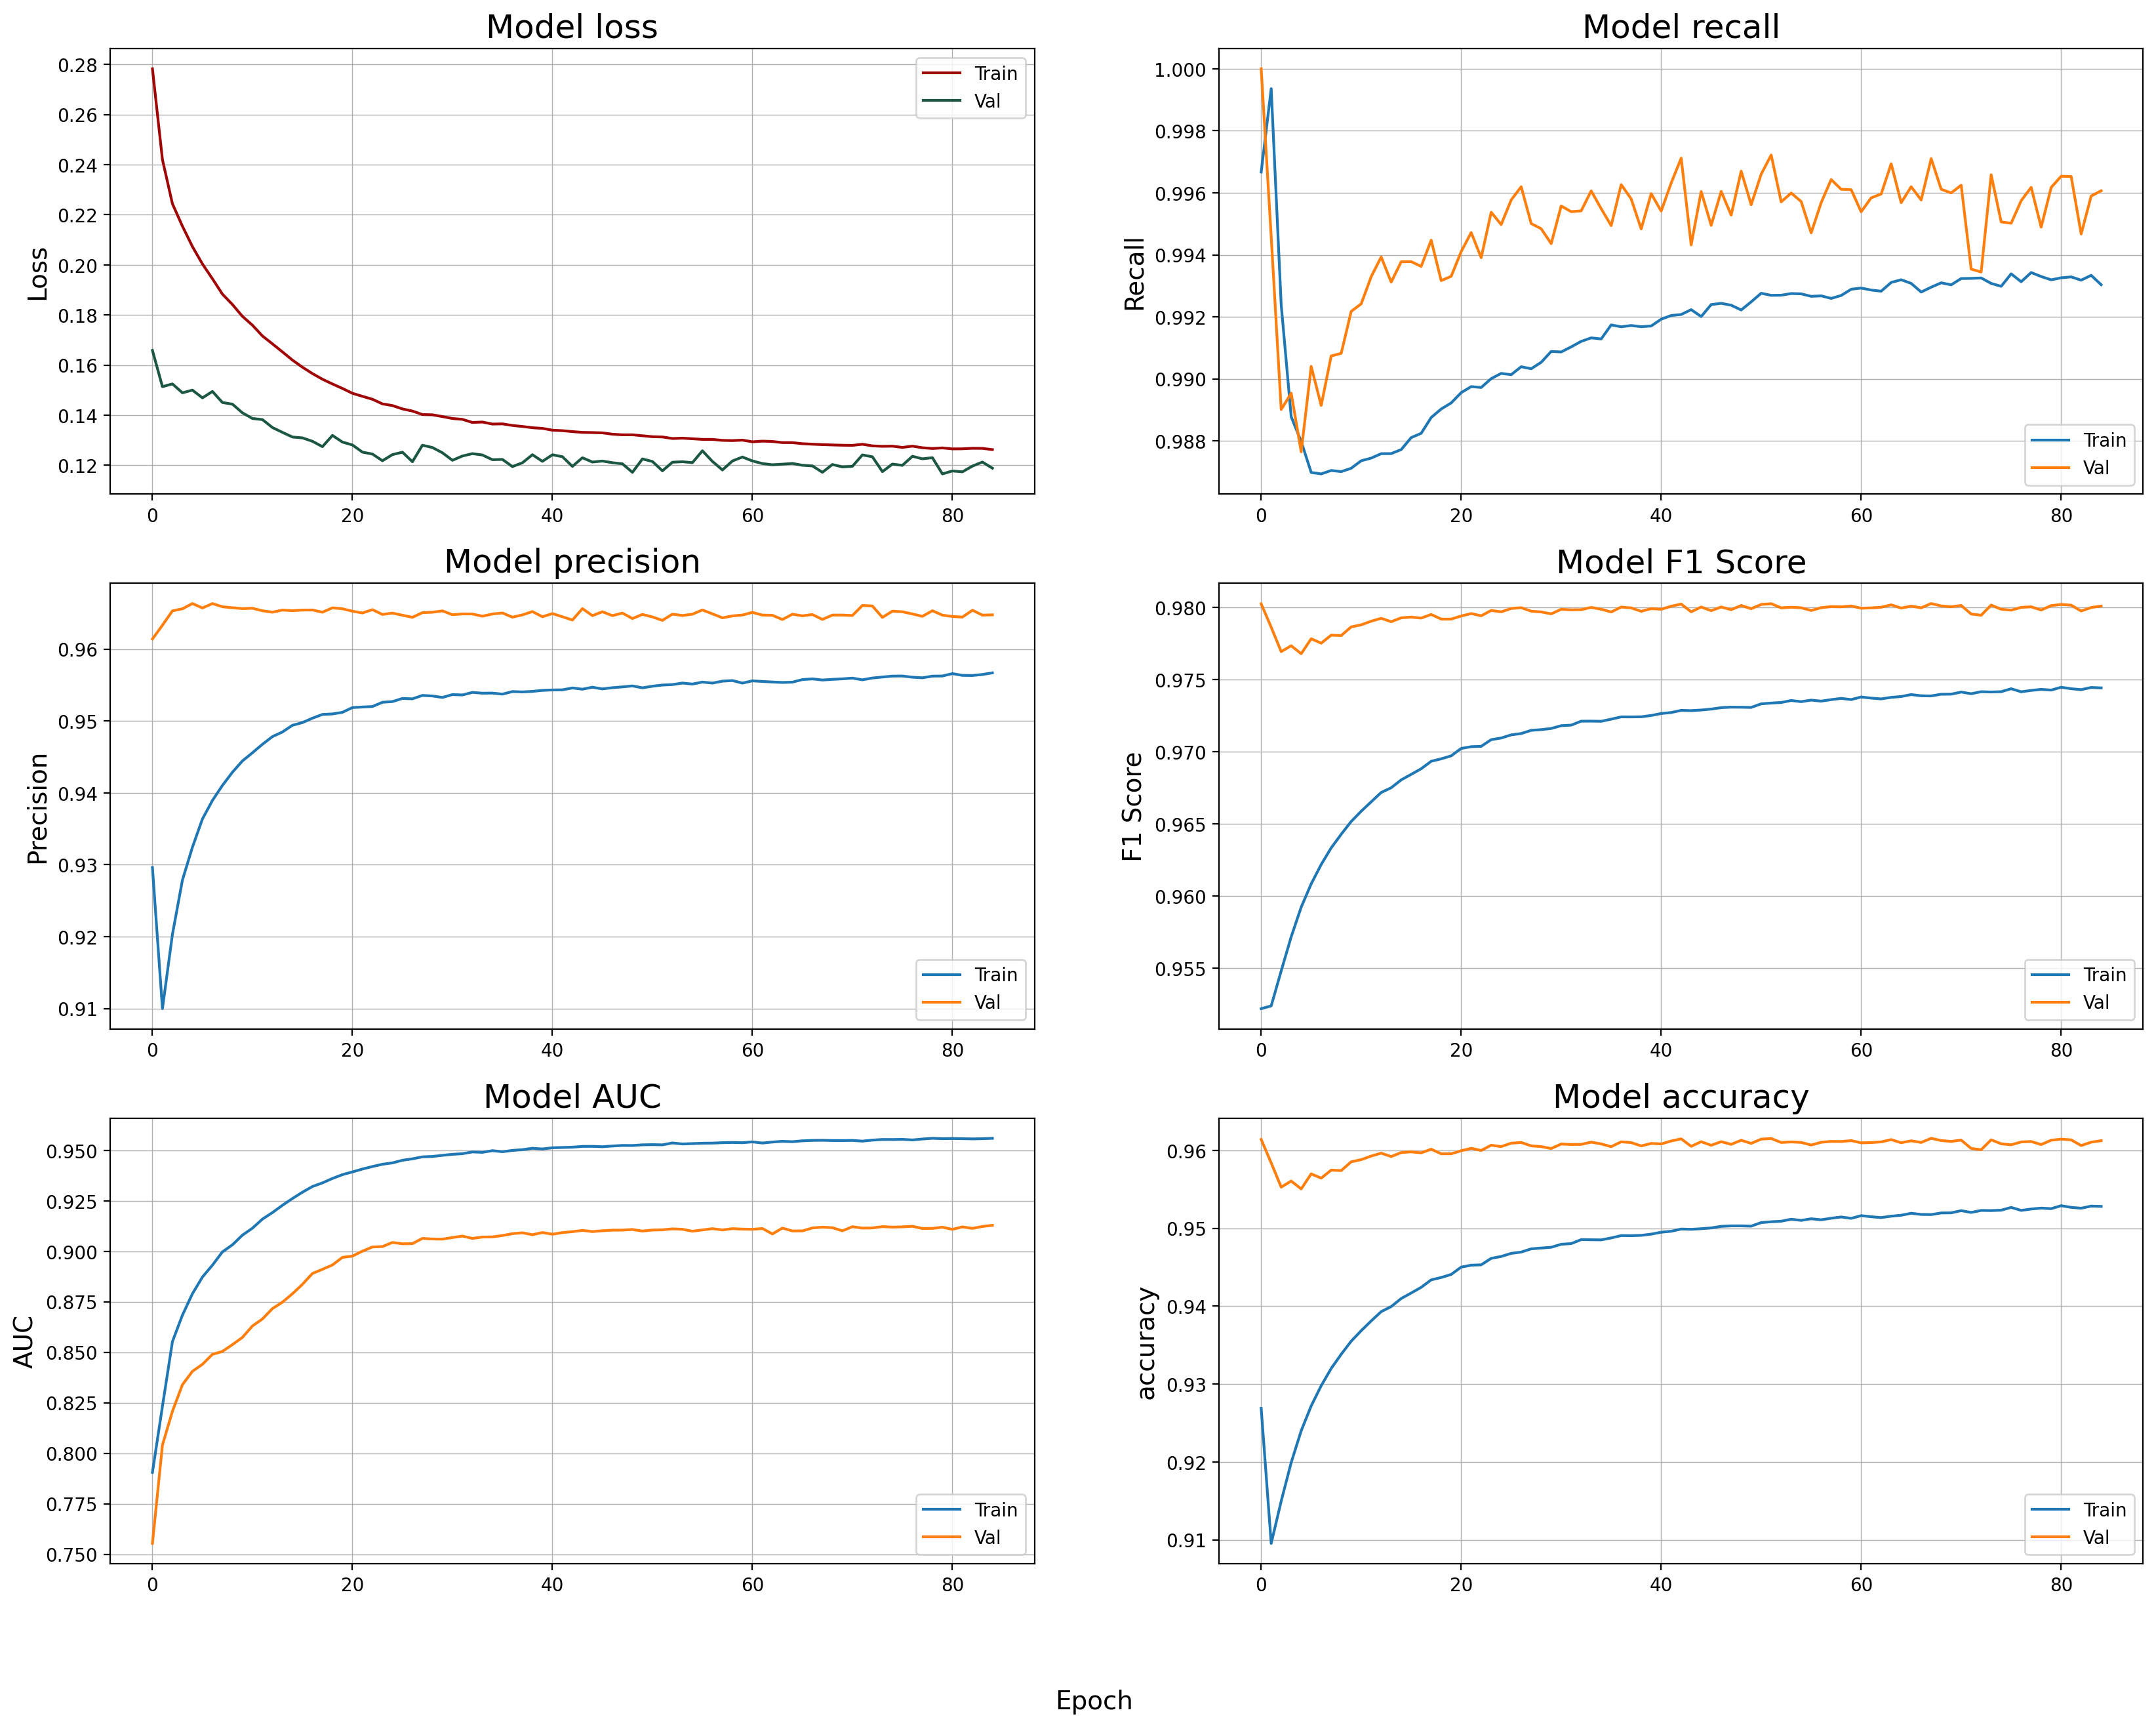

Show Up for Health


In [101]:
plot_loss_precision_recall_curve(history)
print("Show Up for Health")

# Score model on unseen dataset

In [102]:
model.predict(X_test_scaled)

5635/5635 [==============================] - 1s 247us/step


array([[0.9551191 ],
       [0.9734688 ],
       [0.83981967],
       ...,
       [0.99378604],
       [0.8805054 ],
       [0.9851263 ]], dtype=float32)

In [103]:
model.evaluate(X_test_scaled, y_test, verbose=0, return_dict=True)

{'loss': 0.15106327831745148,
 'cross entropy': 0.15106327831745148,
 'f1_score': 0.9762036800384521,
 'accuracy': 0.9545101523399353,
 'precision': 0.9664943218231201,
 'recall': 0.9868918061256409,
 'auc': 0.8396380543708801,
 'prc': 0.9916439056396484}

In [77]:
from datetime import datetime

now = datetime.now()
datetime_string = now.strftime("%Y-%m-%d %H-%M-%S")

model.save(f'model_weights_{datetime_string}.h5')

In [78]:
y_pred_proba = model.predict(X_test_scaled)

5635/5635 [==============================] - 1s 234us/step


In [79]:
threshold = 0.50 # 50% 

y_pred_binary = np.where(y_pred_proba > threshold, 1, 0 )

## Confusion Matrix

In [80]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_binary)
cm

array([[  1001,   5976],
       [  2471, 170856]])

Text(0.5, 25.722222222222214, 'Predicted label')

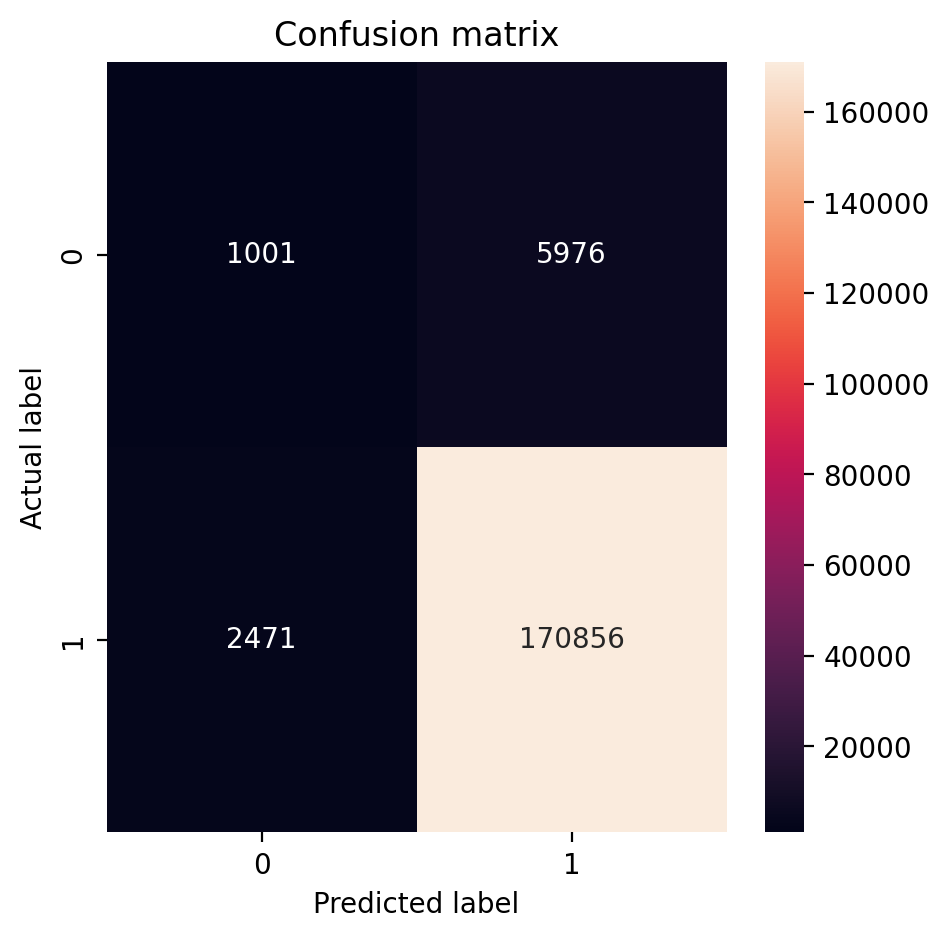

In [81]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.29      0.14      0.19      6977
           1       0.97      0.99      0.98    173327

    accuracy                           0.95    180304
   macro avg       0.63      0.56      0.58    180304
weighted avg       0.94      0.95      0.95    180304



In [83]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

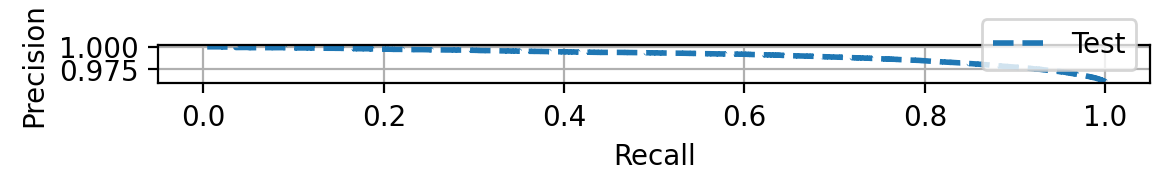

In [84]:
plot_prc("Test", y_test, y_pred_proba, linestyle='--')
plt.legend(loc='lower right')